In [2]:
import pandas as pd
import sqlite3
import openpyxl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

import csv file

In [3]:
df = pd.read_csv("../Sample-Superstore.csv", sep = ",", encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

data cleaning, data featuering

In [5]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [6]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [7]:
df.columns = df.columns.str.replace(' ','')

In [8]:
df.columns = df.columns.str.replace('-','')
df.head(5)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df["ProductPrice"] = df["Sales"]/df["Quantity"]
df["ListPrice"] = (df["Sales"]/(1-df["Discount"]))/df["Quantity"]


In [10]:
df["CostPrice"] = round(df["Sales"]-df["Profit"])
df["ProfitRate"] = round(df["Profit"]/df["Sales"]*100,2)

In [11]:
df = df.round({"Sales":2, "Profit":2, "ProductPrice": 2})
df.head(5)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ProductPrice,ListPrice,CostPrice,ProfitRate
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,130.98,130.98,220.0,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,243.98,243.98,512.0,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,7.31,7.31,8.0,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,191.52,348.21,1341.0,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,11.18,13.98,20.0,11.25


feature engineering

In [12]:
df.insert(0, 'AddressID', range(1, 1 + len(df)))
df.insert(1,'ShipmentID',range(1,1+ len(df)))

In [13]:
df = df.drop(["AddressID"], axis = 1)

In [14]:
# from datetime extract month and year https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
df["month"] = pd.DatetimeIndex(df["OrderDate"]).month

In [15]:
df["year"] = pd.DatetimeIndex(df["OrderDate"]).year

In [16]:
df["quarter"] = pd.DatetimeIndex(df["OrderDate"]).quarter

In [17]:
df["weekday"] = pd.DatetimeIndex(df["OrderDate"]).weekday

In [18]:
# https://medium.com/aatomz-research/let-lambda-do-feature-engineering-ac9e52fb6a5e

df["workingday"] = df["weekday"].map(lambda x: 1 if x <=4 else 0)

In [19]:
df=df.drop(["RowID"], axis=1)

In [20]:
df.head()

,ShipmentID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Profit,ProductPrice,ListPrice,CostPrice,ProfitRate,month,year,quarter,weekday,workingday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.91,130.98,130.98,220.0,16.00,11,2016,4,1,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.58,243.98,243.98,512.0,30.00,11,2016,4,1,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.87,7.31,7.31,8.0,47.00,6,2016,2,6,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.03,191.52,348.21,1341.0,-40.00,10,2015,4,6,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.52,11.18,13.98,20.0,11.25,10,2015,4,6,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ShipmentID    9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   datetime64[ns]
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  SubCategory   9994 non-null   object  

In [22]:
df.to_csv("superstore.csv", decimal=",", sep=";")

# EDA 

question 1: What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc.


yearly

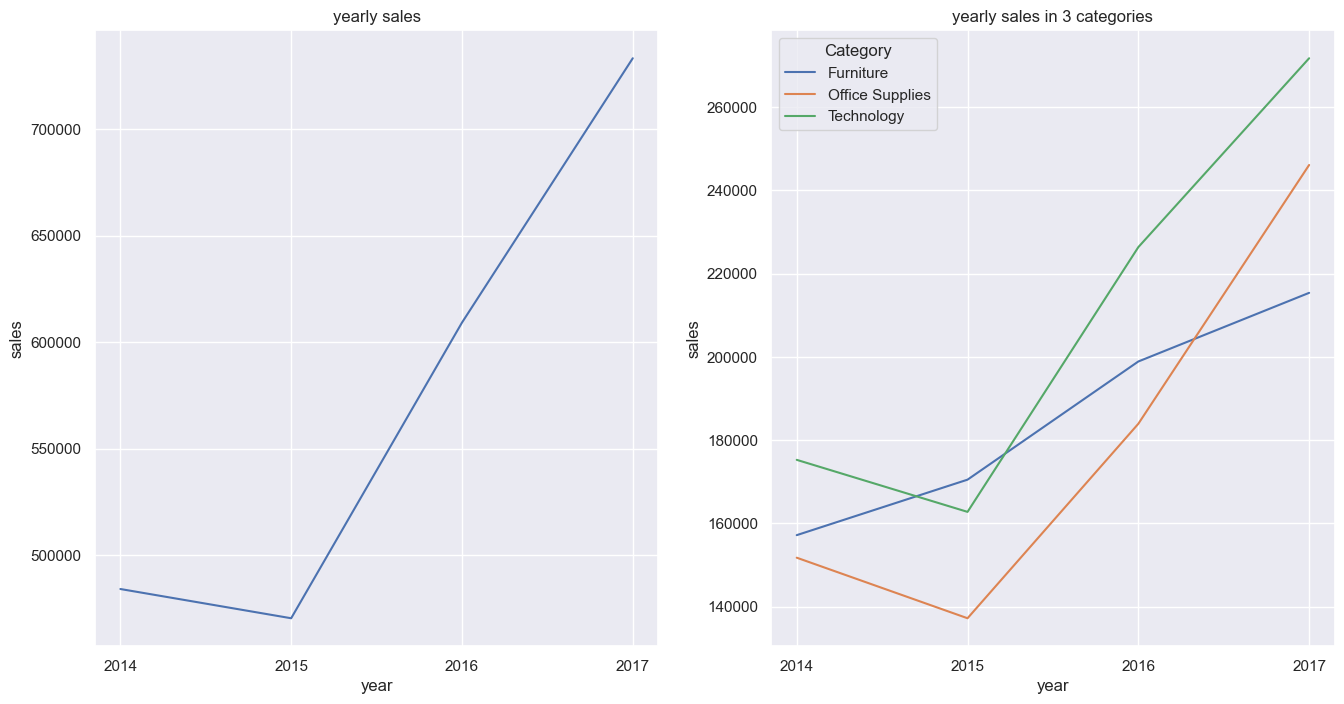

In [23]:

plt.figure(figsize=(16,8))
plt.subplot(121, title = "yearly sales")
sns.lineplot(data= df, x = df["year"], y = df["Sales"], errorbar= None, estimator= "sum")
plt.xlabel("year")
plt.xticks([2014,2015,2016,2017])
               
plt.ylabel("sales")
#x = np.arange(0,24)
plt.subplot(122, title = "yearly sales in 3 categories")
sns.lineplot(data= df, x = df["year"], y = df["Sales"], hue = df["Category"], errorbar= None, estimator= "sum")
plt.xlabel("year")
plt.xticks([2014,2015,2016,2017])
plt.ylabel("sales")
plt.show()

monthly sales

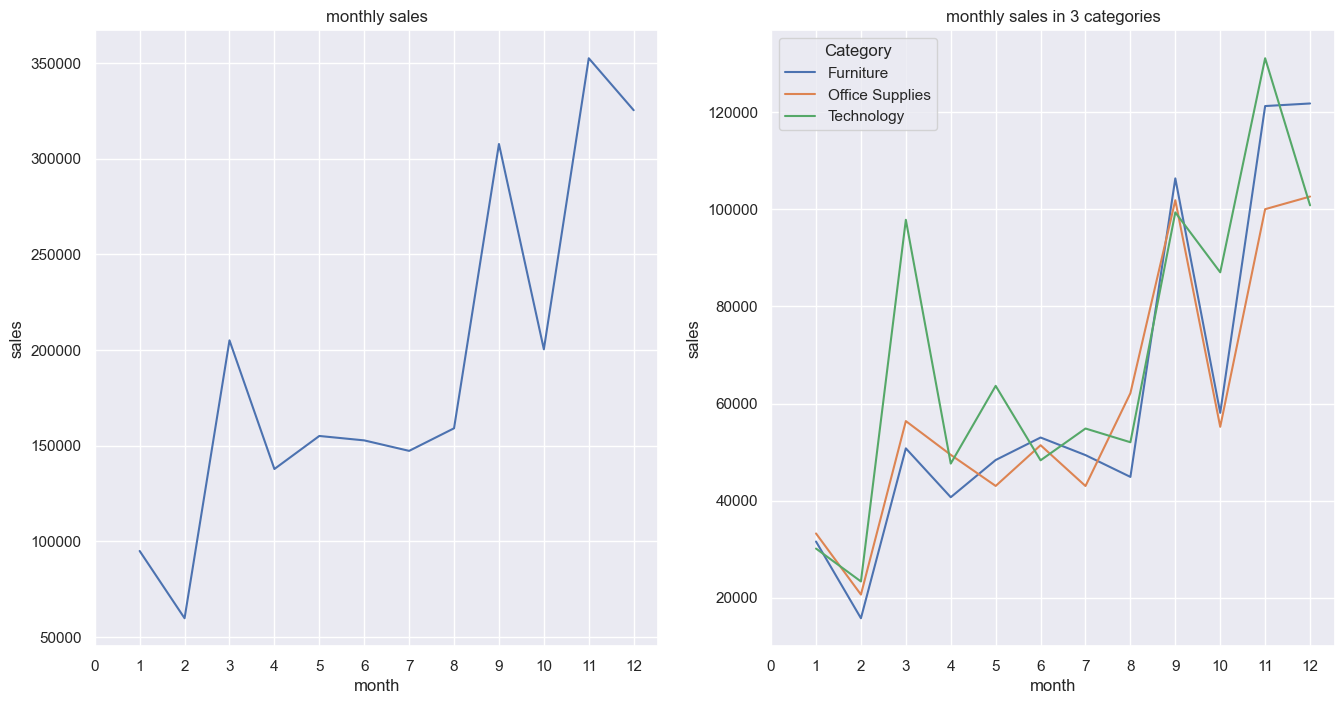

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(121, title = "monthly sales")
sns.lineplot(data= df, x = df["month"], y = df["Sales"], errorbar= None, estimator= "sum")
plt.xlabel("month")               
plt.ylabel("sales")
x = np.arange(0,13)
plt.xticks(x)
plt.subplot(122, title = "monthly sales in 3 categories")
sns.lineplot(data= df, x = df["month"], y = df["Sales"], hue = df["Category"], errorbar= None, estimator= "sum")
plt.xlabel("month")
plt.ylabel("sales")
plt.xticks(x)
plt.show()

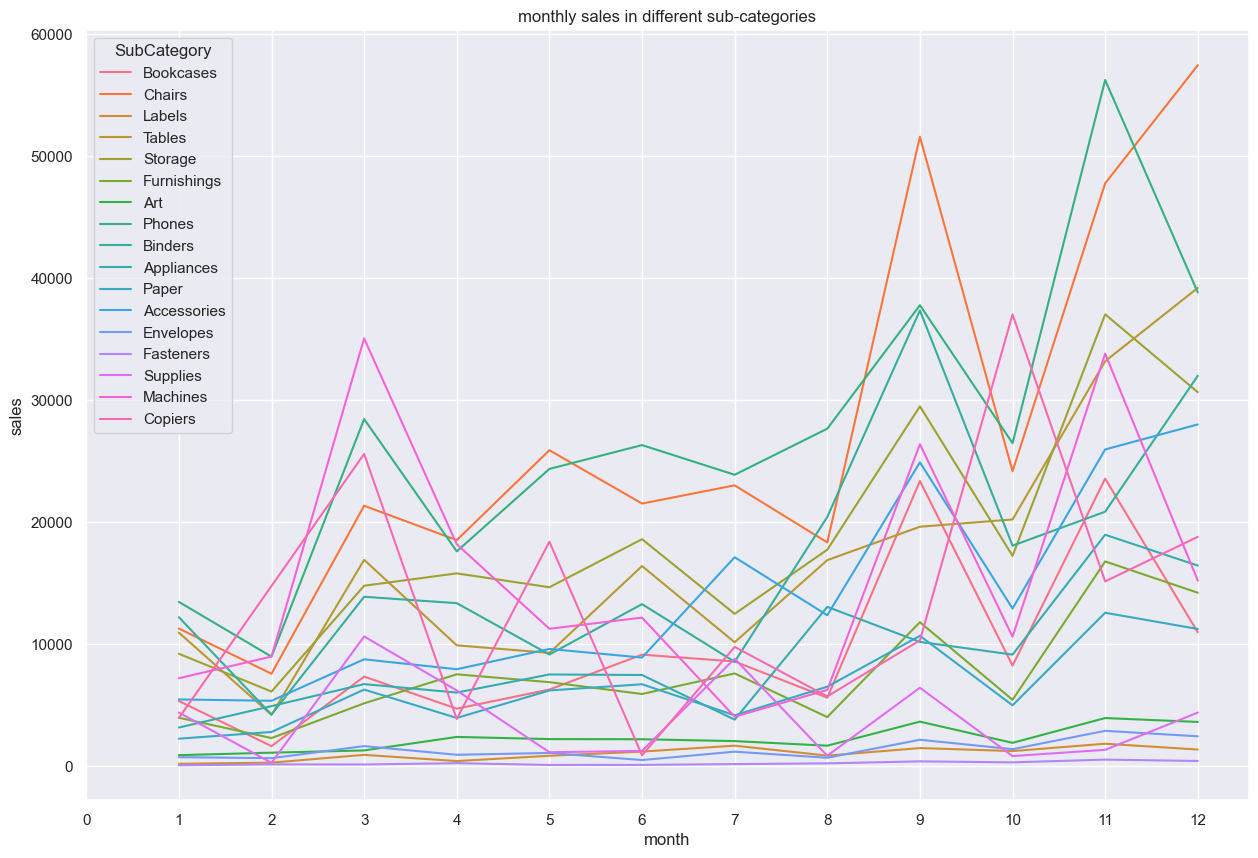

In [25]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data= df, x = df["month"], y = df["Sales"], hue = df["SubCategory"], errorbar= None, estimator= "sum")
plt.xlabel("month")
plt.ylabel("sales")
plt.xticks(x)
plt.title("monthly sales in different sub-categories")
sns.move_legend(ax, "upper left")
plt.show()

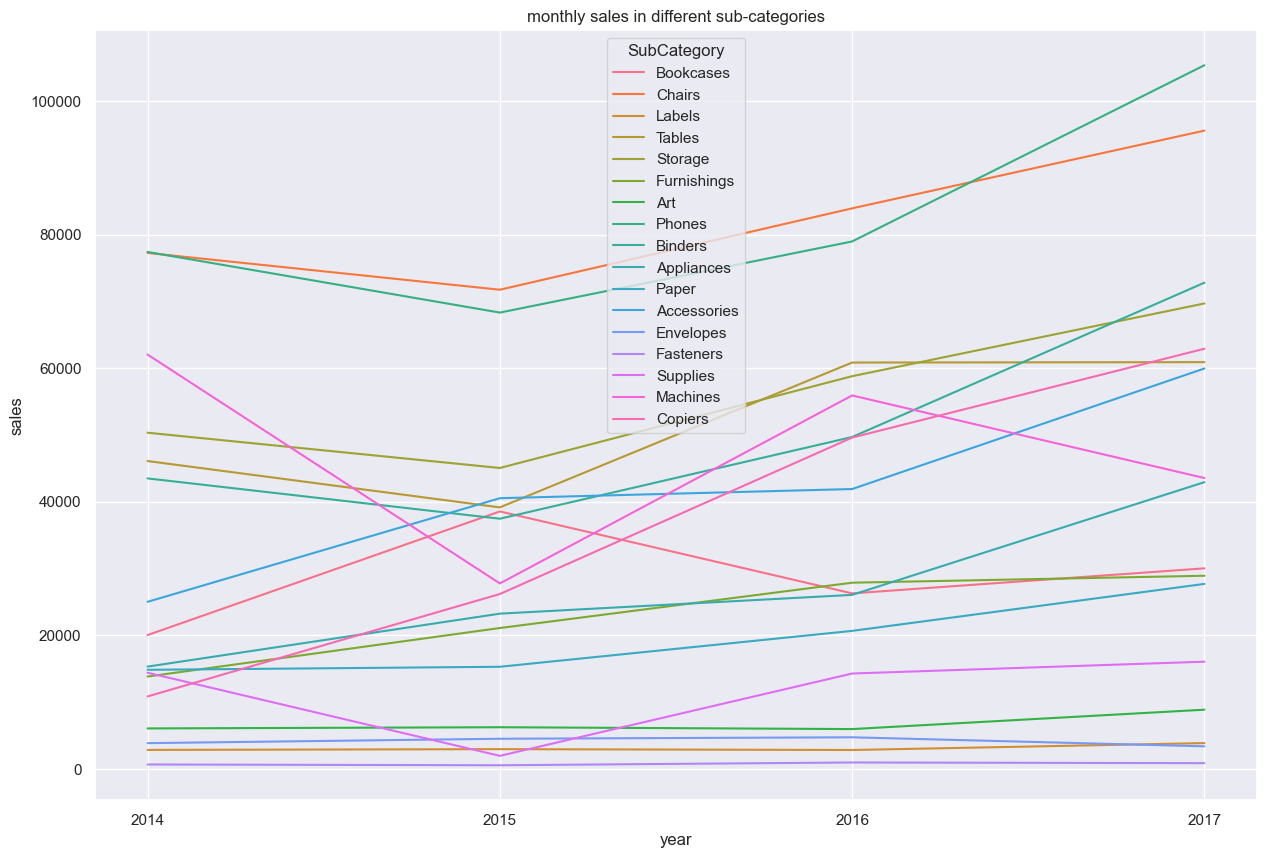

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(data= df, x = df["year"], y = df["Sales"], hue = df["SubCategory"], errorbar= None, estimator= "sum")
plt.xlabel("year")
plt.ylabel("sales")
plt.title("monthly sales in different sub-categories")
plt.xticks([2014,2015,2016,2017])
plt.show()

monthly sales in 

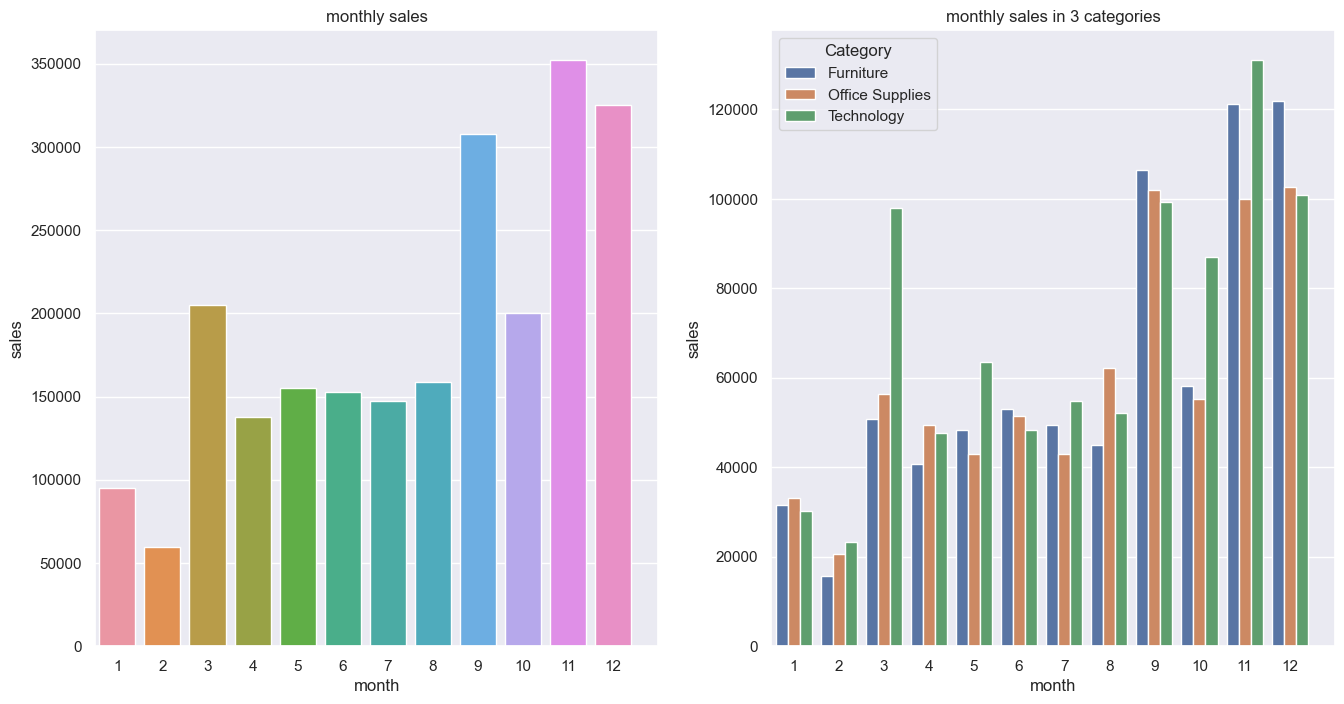

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(121, title = "monthly sales")
sns.barplot(data= df, x = df["month"], y = df["Sales"], estimator="sum", errorbar =None)
plt.xlabel("month")               
plt.ylabel("sales")
x = np.arange(0,13)
plt.xticks(x)
plt.subplot(122, title = "monthly sales in 3 categories")
sns.barplot(data= df, x = df["month"], y = df["Sales"], hue = df["Category"],estimator="sum", errorbar= None)
plt.xlabel("month")
plt.ylabel("sales")
plt.xticks(x)
plt.show()

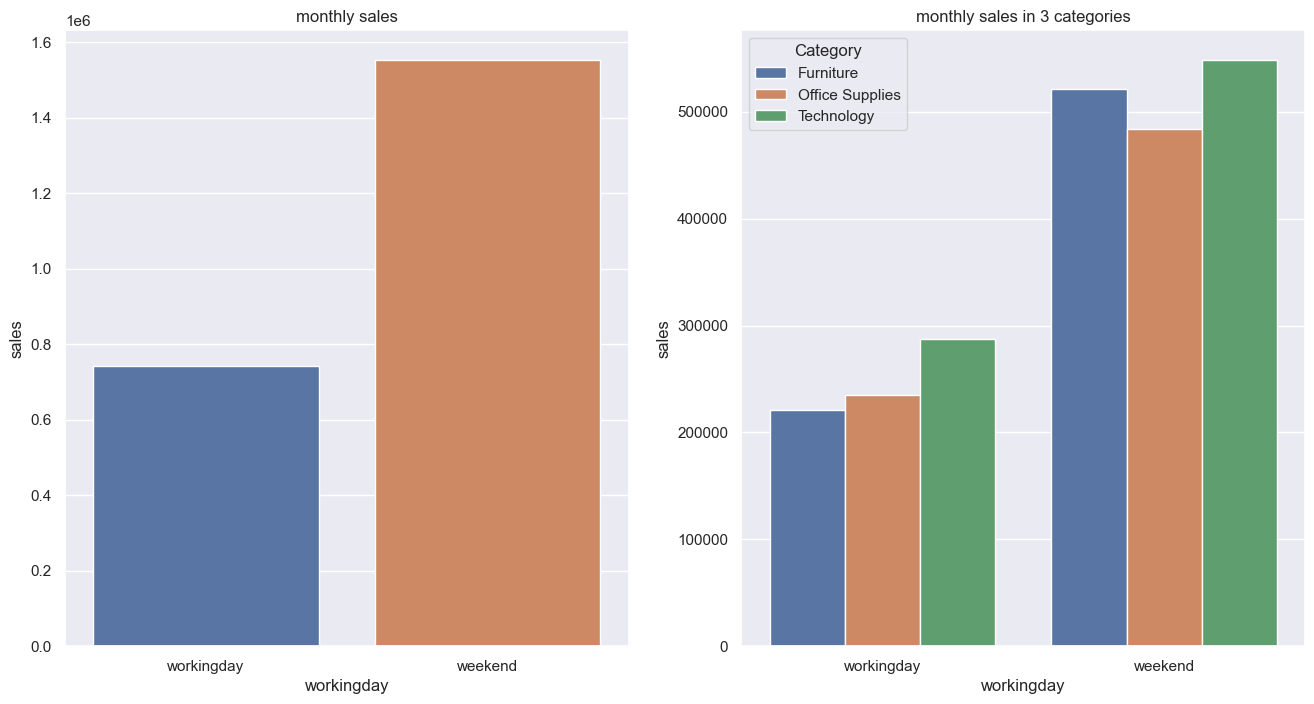

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(121, title = "monthly sales")
sns.barplot(data= df, x = df["workingday"], y = df["Sales"], estimator="sum", errorbar=None)
plt.ylabel("sales")
plt.xticks([0,1],
               ["workingday", "weekend"])
plt.subplot(122, title = "monthly sales in 3 categories")
sns.barplot(data= df, x = df["workingday"], y = df["Sales"], hue = df["Category"],estimator="sum", errorbar= None)
plt.ylabel("sales")
plt.xticks([0,1],
               ["workingday", "weekend"])
plt.show()

# create separate tabels: order, customer, product, shipment, order_details, region

In [29]:
df_order_detail = df[["OrderID", "CustomerID", "ProductID", "Quantity", "Sales","Profit"]]
df_order_detail

,OrderID,CustomerID,ProductID,Quantity,Sales,Profit
0,CA-2016-152156,CG-12520,FUR-BO-10001798,2,261.96,41.91
1,CA-2016-152156,CG-12520,FUR-CH-10000454,3,731.94,219.58
2,CA-2016-138688,DV-13045,OFF-LA-10000240,2,14.62,6.87
3,US-2015-108966,SO-20335,FUR-TA-10000577,5,957.58,-383.03
4,US-2015-108966,SO-20335,OFF-ST-10000760,2,22.37,2.52
...,...,...,...,...,...,...
9989,CA-2014-110422,TB-21400,FUR-FU-10001889,3,25.25,4.10
9990,CA-2017-121258,DB-13060,FUR-FU-10000747,2,91.96,15.63
9991,CA-2017-121258,DB-13060,TEC-PH-10003645,2,258.58,19.39
9992,CA-2017-121258,DB-13060,OFF-PA-10004041,4,29.60,13.32


In [30]:
# using group by to remove dupicate on order table 
df_orders = df[["OrderID", "OrderDate", "CustomerID"]]
df_orders = df_orders.drop_duplicates()

In [31]:
df["OrderID"].unique().size

5009

In [32]:
df_customer = df[["CustomerID", "CustomerName", "Segment", "PostalCode"]]
df_customer

,CustomerID,CustomerName,Segment,PostalCode
0,CG-12520,Claire Gute,Consumer,42420
1,CG-12520,Claire Gute,Consumer,42420
2,DV-13045,Darrin Van Huff,Corporate,90036
3,SO-20335,Sean O'Donnell,Consumer,33311
4,SO-20335,Sean O'Donnell,Consumer,33311
...,...,...,...,...
9989,TB-21400,Tom Boeckenhauer,Consumer,33180
9990,DB-13060,Dave Brooks,Consumer,92627
9991,DB-13060,Dave Brooks,Consumer,92627
9992,DB-13060,Dave Brooks,Consumer,92627


In [33]:
df_customer = df_customer.drop_duplicates(subset="CustomerID", keep="first")
df_customer["CustomerID"].unique().size

793

In [34]:
df_customer["CustomerID"].unique().size

793

In [35]:
df_product = df[["ProductID","ProductName", "Category", "SubCategory"]]
df_product

,ProductID,ProductName,Category,SubCategory
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
9989,FUR-FU-10001889,Ultra Door Pull Handle,Furniture,Furnishings
9990,FUR-FU-10000747,Tenex B1-RE Series Chair Mats for Low Pile Car...,Furniture,Furnishings
9991,TEC-PH-10003645,Aastra 57i VoIP phone,Technology,Phones
9992,OFF-PA-10004041,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Office Supplies,Paper


In [36]:
df_product["ProductID"].unique().size

1862

In [37]:
df_product["ProductName"].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Eureka Hand Vacuum, Bagless', 'LG G2',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

In [38]:
df_product = df_product.drop_duplicates(subset="ProductID")
df_product

,ProductID,ProductName,Category,SubCategory
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
9521,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
9562,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines
9604,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
9673,TEC-PH-10002645,LG G2,Technology,Phones


In [39]:
df_product["ProductID"].unique().size

1862

In [40]:
df.head()

,ShipmentID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Profit,ProductPrice,ListPrice,CostPrice,ProfitRate,month,year,quarter,weekday,workingday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.91,130.98,130.98,220.0,16.00,11,2016,4,1,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.58,243.98,243.98,512.0,30.00,11,2016,4,1,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.87,7.31,7.31,8.0,47.00,6,2016,2,6,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.03,191.52,348.21,1341.0,-40.00,10,2015,4,6,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.52,11.18,13.98,20.0,11.25,10,2015,4,6,0


In [41]:
df_shipment = df[["ShipmentID","OrderID", "ShipDate", "ShipMode"]]
df_shipment
""" df_shipment = df_shipment.drop_duplicates(subset =[ "OrderID", "ProductID"])
df_shipment """

' df_shipment = df_shipment.drop_duplicates(subset =[ "OrderID", "ProductID"])\ndf_shipment '

In [42]:
df_shipment

,ShipmentID,OrderID,ShipDate,ShipMode
0,1,CA-2016-152156,2016-11-11,Second Class
1,2,CA-2016-152156,2016-11-11,Second Class
2,3,CA-2016-138688,2016-06-16,Second Class
3,4,US-2015-108966,2015-10-18,Standard Class
4,5,US-2015-108966,2015-10-18,Standard Class
...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-23,Second Class
9990,9991,CA-2017-121258,2017-03-03,Standard Class
9991,9992,CA-2017-121258,2017-03-03,Standard Class
9992,9993,CA-2017-121258,2017-03-03,Standard Class


In [43]:
#pivot table 
df_shipment_cnt = df_shipment.pivot_table(columns=['OrderID','ShipDate','ShipMode'], aggfunc='size')
df_shipment_cnt

OrderID         ShipDate    ShipMode      
CA-2014-100006  2014-09-13  Standard Class    1
CA-2014-100090  2014-07-12  Standard Class    2
CA-2014-100293  2014-03-18  Standard Class    1
CA-2014-100328  2014-02-03  Standard Class    1
CA-2014-100363  2014-04-15  Standard Class    2
                                             ..
US-2017-168802  2017-11-07  Standard Class    1
US-2017-169320  2017-07-25  Second Class      2
US-2017-169488  2017-09-09  First Class       2
US-2017-169502  2017-09-01  Standard Class    2
US-2017-169551  2017-07-09  First Class       6
Length: 5009, dtype: int64

In [44]:
""" df_sales = df[["OrderID","ProductID", "Quantity","ProductPrice","Sales", "Discount"]]
df_sales """

' df_sales = df[["OrderID","ProductID", "Quantity","ProductPrice","Sales", "Discount"]]\ndf_sales '

In [45]:
""" df_sales.drop_duplicates() """

' df_sales.drop_duplicates() '

In [46]:
""" df_sales_detail = df[["ProductID","Quantity","Sales", "Discount", "Profit", "CostPrice", "ProfitRate"]]
df_sales_detail """

' df_sales_detail = df[["ProductID","Quantity","Sales", "Discount", "Profit", "CostPrice", "ProfitRate"]]\ndf_sales_detail '

In [47]:
df_region = df[["PostalCode", "City", "State", "Region"]]

In [48]:
df_region = df_region.drop_duplicates()

In [49]:
df_region["PostalCode"].unique().size

631

In [50]:
df_region

,PostalCode,City,State,Region
0,42420,Henderson,Kentucky,South
2,90036,Los Angeles,California,West
3,33311,Fort Lauderdale,Florida,South
5,90032,Los Angeles,California,West
12,28027,Concord,North Carolina,South
...,...,...,...,...
9760,72762,Springdale,Arkansas,South
9801,95240,Lodi,California,West
9834,77571,La Porte,Texas,Central
9868,45040,Mason,Ohio,East


# connect with sqlite

In [51]:
db_name = "ProjektEcomm02.db"
conn = sqlite3.connect(db_name)


put tables in database

In [52]:
df_orders.to_sql(name = "orders", con = conn, if_exists="replace", index=False)
df_order_detail.to_sql(name = "order_detail", con = conn, if_exists="replace", index=False)
df_customer.to_sql(name = "customer", con = conn, if_exists="replace", index=False)
df_product.to_sql(name = "product", con = conn, if_exists="replace", index=False)
df_shipment.to_sql(name = "shipment", con = conn, if_exists="replace", index=False)
df_region.to_sql(name = "region", con = conn, if_exists="replace", index=False) 

632

In [53]:
pd.read_sql("SELECT * FROM orders LIMIT 5", conn)


,OrderID,OrderDate,CustomerID
0,CA-2016-152156,2016-11-08 00:00:00,CG-12520
1,CA-2016-138688,2016-06-12 00:00:00,DV-13045
2,US-2015-108966,2015-10-11 00:00:00,SO-20335
3,CA-2014-115812,2014-06-09 00:00:00,BH-11710
4,CA-2017-114412,2017-04-15 00:00:00,AA-10480


In [54]:
db_name = "ProjektEcomm.db"
conn = sqlite3.connect(db_name)

In [55]:
df_orders.to_sql(name = "orders", con = conn, if_exists="replace", index=False)
df_order_detail.to_sql(name = "order_detail", con = conn, if_exists="replace", index=False)

9994

In [56]:
#df_customer.to_sql(name = "customer", con = conn,if_exists="replace" )


In [57]:
""" //// -- creating ERD https://dbdiagram.io/home
//// -- Tables and References

// Creating tables
Table customer as P {
  CustomerID Text [pk] // auto-increment
  CustomerName Text
  Segment Text
  City Text
  State Text
  PostalCode int[fk]
}

Table order{
  OrderID text[pk]
  OrderDate timestamp
  CustomerID text
  ProductID text
  Quantity int
  Sales float
 }
 
Table product  {
  ProductID Text[pk]
  ProductName text
  Category text
  SubCategory text
 }
 
Table region {
  PostalCode int[pk]
  City text
  State text
  Region text
 }
 
Table sales {
  OrderID text [pk]
  Quantity int
  ProductPrice float[pk]
  Sales float
  Discount float
 } 

Table shipment {
  Rating float
  Review_Count int
  ASIN varchar[pk]
 } 
// Creating references
// You can also define relaionship separately
// > many-to-one; < one-to-many; - one-to-one
Ref: P.ASIN > I.ASIN  
Ref: P.ASIN > A.ASIN
Ref: I.CustomerID > Customer.CustomerID

//-------- """

' //// -- creating ERD https://dbdiagram.io/home\n//// -- Tables and References\n\n// Creating tables\nTable customer as P {\n  CustomerID Text [pk] // auto-increment\n  CustomerName Text\n  Segment Text\n  City Text\n  State Text\n  PostalCode int[fk]\n}\n\nTable order{\n  OrderID text[pk]\n  OrderDate timestamp\n  CustomerID text\n  ProductID text\n  Quantity int\n  Sales float\n }\n \nTable product  {\n  ProductID Text[pk]\n  ProductName text\n  Category text\n  SubCategory text\n }\n \nTable region {\n  PostalCode int[pk]\n  City text\n  State text\n  Region text\n }\n \nTable sales {\n  OrderID text [pk]\n  Quantity int\n  ProductPrice float[pk]\n  Sales float\n  Discount float\n } \n\nTable shipment {\n  Rating float\n  Review_Count int\n  ASIN varchar[pk]\n } \n// Creating references\n// You can also define relaionship separately\n// > many-to-one; < one-to-many; - one-to-one\nRef: P.ASIN > I.ASIN  \nRef: P.ASIN > A.ASIN\nRef: I.CustomerID > Customer.CustomerID\n\n//-------- '

for SQL create empty table, then export dataframe from python to sql; but fail geschlagen

In [58]:
""" CREATE TABLE if not exists 'customer' (     --df_customer
'CustomerID' varchar (100),
'CustomerName'  varchar(100),
'Segment' varchar(100),
'City' varchar(100),
'State' varchar(100),
'PostalCode' INTEGER,
PRIMARY KEY ('CustomerID')
);

CREATE TABLE if not exists 'orders' (    --df_order
'OrderID' varchar (100),
'OrderDate'  varchar(100),
'CustomerID' varchar(100),
PRIMARY KEY ('OrderID')
);

CREATE TABLE if not exists 'order_detail' (    --df_order_detail
'OrderID' varchar (100),
'CustomerID' varchar(100),
'ProductID' varchar(100),
'Quantity'varchar(100),
'Sales' varchar(100),
PRIMARY KEY ('CustomerID', 'ProductID')
);

CREATE TABLE if not exists 'product' (    --df_product
'ProductID' varchar (100),
'ProductName' varchar(100),
'Category' varchar(100),
'SubCategory'varchar(100),
PRIMARY KEY ('ProductID', 'ProductName')
);

CREATE TABLE if not exists 'shipment' (    --df_shipment
'OrderID' varchar (100),
'ShipDate' datetime(100),
'ShipMode' varchar(100),
PRIMARY Key ('OrderID')
);


CREATE TABLE if not exists 'sales' (    --df_sales
'OrderID' varchar (100),
'ProductID' varchar(100),
'Quantity' INTEGER,
'ProductPrice' float,
'Sales' float,
'Discount' float,

 Primary KEY ('OrderID','ProductID')
 FOREIGN KEY('ProductID') REFERENCES product
);

CREATE TABLE if not exists 'sales_detail' (
'ProductID' varchar (100),
'ProductName' varchar (100),
'Quantity' INTEGER,
'Sales' float,
'Discount' float,
'Profit' float,
'CostPrice' float,
'Profitrate' float,
PRIMARY KEY ('ProductID','ProductName')
);

CREATE TABLE if not exists 'region' (    --df_region
'PostalCode'  INTEGER,
'City' varchar(100),
'State' varchar(100),
'Region' varchar(100),
 PRIMARY KEY ('PostalCode')
);
 """

" CREATE TABLE if not exists 'customer' (     --df_customer\n'CustomerID' varchar (100),\n'CustomerName'  varchar(100),\n'Segment' varchar(100),\n'City' varchar(100),\n'State' varchar(100),\n'PostalCode' INTEGER,\nPRIMARY KEY ('CustomerID')\n);\n\nCREATE TABLE if not exists 'orders' (    --df_order\n'OrderID' varchar (100),\n'OrderDate'  varchar(100),\n'CustomerID' varchar(100),\nPRIMARY KEY ('OrderID')\n);\n\nCREATE TABLE if not exists 'order_detail' (    --df_order_detail\n'OrderID' varchar (100),\n'CustomerID' varchar(100),\n'ProductID' varchar(100),\n'Quantity'varchar(100),\n'Sales' varchar(100),\nPRIMARY KEY ('CustomerID', 'ProductID')\n);\n\nCREATE TABLE if not exists 'product' (    --df_product\n'ProductID' varchar (100),\n'ProductName' varchar(100),\n'Category' varchar(100),\n'SubCategory'varchar(100),\nPRIMARY KEY ('ProductID', 'ProductName')\n);\n\nCREATE TABLE if not exists 'shipment' (    --df_shipment\n'OrderID' varchar (100),\n'ShipDate' datetime(100),\n'ShipMode' varchar